# Regression Models

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
RawData = pd.read_csv("Rtrain.csv")
data = RawData.drop(columns = ["mass_npea", "size_npear", "malign_ratio"])
data.columns = ["Damage Size", "Exposed Area", "Malignancy Standard Deviation", "Malignancy Error", "Malignancy Penalty", "Damage Ratio", "Tumor Size"]
data.head()
data.head()

,Damage Size,Exposed Area,Malignancy Standard Deviation,Malignancy Error,Malignancy Penalty,Damage Ratio,Tumor Size
0,51.8298,988829.407,109.487,2758.76,72,39.3620,14.103
1,223.5500,2058426.301,248.881,5952.53,240,22.0253,2.648
2,127.3370,1434676.100,160.093,4635.26,73,29.9963,1.688
3,155.4400,1812195.183,173.015,5273.87,32,28.1354,3.796
4,85.1237,1043917.501,124.414,3263.35,57,35.0200,18.023


In [3]:
X = data.drop(columns = ["Tumor Size"]).values
y = data['Tumor Size'].values

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 41)

scaler = StandardScaler()
XTrain = scaler.fit_transform(XTrain)
XTest = scaler.transform(XTest)

# Non-Negative Least Squares Regression

In [4]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [7]:
NNLS = LinearRegression()
yPred_NNLS = NNLS.fit(XTrain, yTrain).predict(XTest)

r2_score_NNLS = r2_score(yTest, yPred_NNLS)
print("Non-Negative Least Squares R2 score:", round(r2_score_NNLS, 2))

mse = mean_squared_error(yTest, yPred_NNLS)
print("Mean Squared Error: ", round(mse, 2))

Non-Negative Least Squares R2 score: 0.19
Mean Squared Error:  29.18


In [8]:
OLS = LinearRegression()
yPred_OLS = OLS.fit(XTrain, yTrain).predict(XTest)
r2_score_OLS = r2_score(yTest, yPred_OLS)
print("Ordinary Least Squares R2 score", r2_score_OLS)

mse = mean_squared_error(yTest, yPred_OLS)
print("Mean Squared Error: ", round(mse, 2))

Ordinary Least Squares R2 score 0.18817103534539292
Mean Squared Error:  29.18


Text(0, 0.5, 'NNLS regression coefficients')

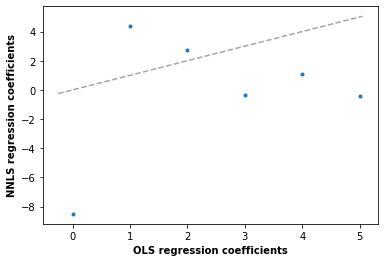

In [9]:
fig, ax = plt.subplots()
ax.plot(NNLS.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

# K-Nearest Neighbors Regression 

In [10]:
from sklearn.neighbors import KNeighborsRegressor

R2 Score: 0.5
Mean Squared Error:  17.93


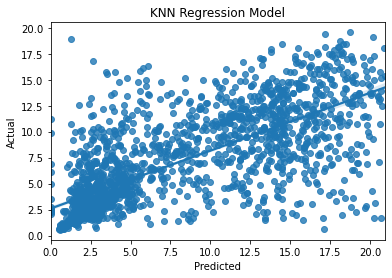

In [11]:
KNN = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')

KNN.fit(XTrain, yTrain)
yPred = KNN.predict(XTest)

sns.regplot(x = yTest, y = yPred)
plt.title("KNN Regression Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')

r2 = r2_score(yTest, yPred)
print('R2 Score:', round(r2, 2))

mse = mean_squared_error(yTest, yPred)
print("Mean Squared Error: ", round(mse, 2))

# Gradient Boosting Regression

In [12]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance

In [13]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01
}

GBR = ensemble.GradientBoostingRegressor(**params)
GBR.fit(XTrain, yTrain)
yPred = GBR.predict(XTest)

r2 = r2_score(yTest, yPred)
print('R2 Score:', round(r2, 2))

mse = mean_squared_error(yTest, GBR.predict(XTest))
print("Mean Squared Error:", round(mse, 2))

R2 Score: 0.33
Mean Squared Error: 24.18


Text(0, 0.5, 'Actual')

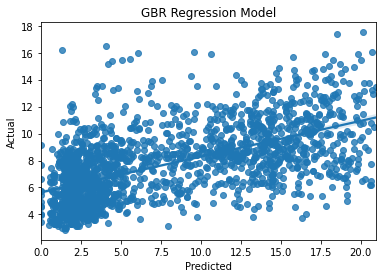

In [14]:
sns.regplot(x = yTest, y = yPred)
plt.title("GBR Regression Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')